# Random Forest

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Importing Datasets

In [2]:
dataset = pd.read_csv("/kaggle/input/insurancedata/insurance_data.csv")

In [3]:
print(dataset.head())

   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1


## Spliting Datas

In [4]:
X = dataset[['age', 'bought_insurance']]
y = dataset [['bought_insurance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print(X_train.shape, X_test.shape)

(21, 2) (6, 2)


## Random Forest 

In [6]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)

In [7]:
y_train = y_train.values.ravel() 
y_test = y_test.values.ravel()
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

## Prediction

In [8]:
y_pred = rf.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



## Confusion Matrix Visualization

In [11]:
cm = confusion_matrix(y_test, y_pred)

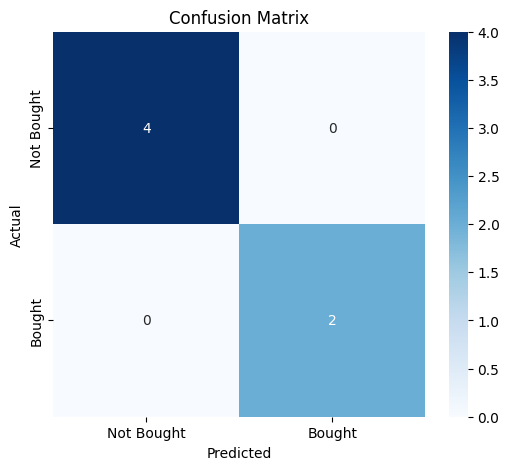

In [12]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Bought', 'Bought'], yticklabels=['Not Bought', 'Bought'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

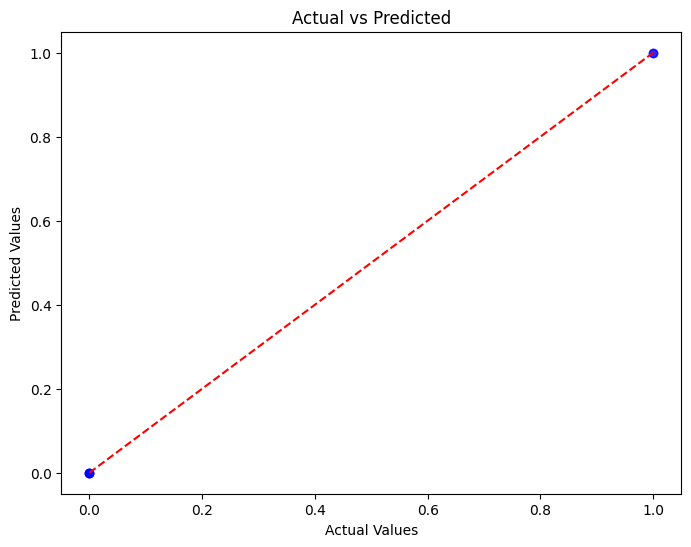

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()